In [1]:
#pip install geodatasets

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt #plotting
import contextily as ctx # for basemaps

In [3]:
data = pd.read_excel("DATA/inform_risk_2025_v070.xlsx")

C:\Users\HP\anaconda3\envs\geopy\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\HP\anaconda3\envs\geopy\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [4]:
df = data[["COUNTRY", "ISO3", "INFORM RISK", "RISK CLASS", "Rank"]]
df.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank
0,Afghanistan,AFG,7.8,Very High,7
1,Albania,ALB,2.9,Low,126
2,Algeria,DZA,3.5,Medium,95
3,Angola,AGO,5.5,High,32
4,Antigua and Barbuda,ATG,2.0,Very Low,174


In [5]:
# Load Natural Earth shapefile
world = gpd.read_file("DATA/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [6]:
# standardize country names (strip spaces, lowercase)
data["COUNTRY_clean"] = data["COUNTRY"].str.strip().str.lower()
world["ADMIN_clean"] = world["ADMIN"].str.strip().str.lower()

In [7]:
merged = world.merge(
    df,                   # The second table (INFORM Risk data)
    left_on="ADMIN",  # Column in `world` to match
    right_on="COUNTRY", # Column in `data` to match
    how="left"              # Type of join
)
merged

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,ADMIN_clean,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",fiji,Fiji,FJI,3.3,Medium,103.0
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",united republic of tanzania,NaN,NaN,NaN,NaN,NaN
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",western sahara,NaN,NaN,NaN,NaN,NaN
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",canada,Canada,CAN,2.7,Low,135.0
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",united states of america,United States of America,USA,3.2,Medium,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",republic of serbia,NaN,NaN,NaN,NaN,NaN
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",montenegro,Montenegro,MNE,2.6,Low,140.0
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",kosovo,NaN,NaN,NaN,NaN,NaN
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...",trinidad and tobago,Trinidad and Tobago,TTO,3.0,Low,117.0


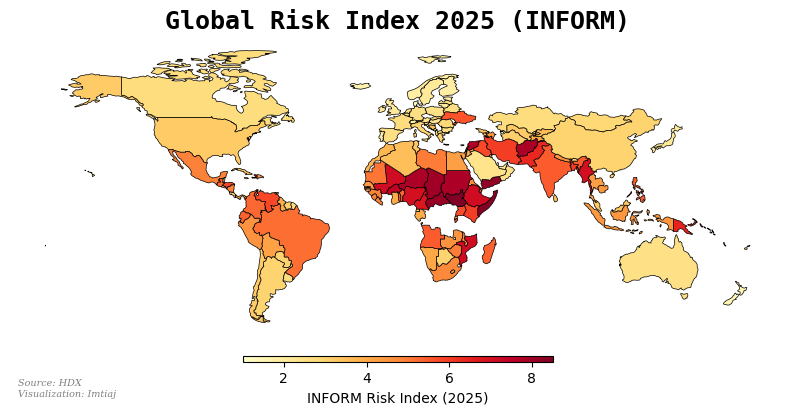

In [99]:
fig, ax = plt.subplots(
    figsize = (10,5))
merged.plot(ax=ax, 
            column = "INFORM RISK",
            #cmap = "viridis",
            cmap = "YlOrRd",
            edgecolor = "k", linewidth=0.5,
            legend = True,
            legend_kwds={
                "label": "INFORM Risk Index (2025)",
                "orientation": "horizontal",
                "pad": 0.05, # space between map and colorbar
                "shrink": 0.4, # scale width of colorbar (0-1)
                "aspect": 50, # controls thickness of the colorbar
                #"ticks": [1, 3,5,7, 8],  # tick positions
                #"fraction": 0.05,
            }           
           )

ax.set_title("Global Risk Index 2025 (INFORM)", 
            fontsize=18, color="k", fontname= "monospace",
            weight="demibold", c= "k")

ax.text(x=.01, y=-.2, s="Source: HDX \nVisualization: Imtiaj",
        transform=ax.transAxes, size = "x-small", 
        fontname= "serif", style= "italic",
        color = "gray")

ax.axis("Off")

plt.savefig("Global Risk Index 2025", dpi= 400, bbox_inches="tight")

In [100]:
#?ax.text
#ax.text?
#ax.text??
#?ax.set_title
#merged.plot?
#?plt.savefig

In [88]:
#plt.colormaps()